# Linear regression model using breast cancer dataset

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = load_breast_cancer()
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
dataset = pd.DataFrame(df.data)

In [7]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
dataset.columns = df.feature_names

In [15]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:

## INDEPENDENT AN DEPENDENT FEATURES
X = dataset

y = df.target

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [21]:
# train test splitttt
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(
X, y, test_size = 0.30 , random_state = 42)


In [23]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [25]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [27]:
# standardization of datasets for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [29]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

In [33]:
X_train 

array([[-0.12348985, -0.29680142, -0.17050713, ..., -0.84082156,
        -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, ..., -0.37706655,
        -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, ..., -0.04762652,
        -0.08997059,  0.4882635 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, ..., -1.26179013,
        -0.6828391 , -1.27672587],
       [-0.05552593,  0.10949242, -0.04684166, ...,  1.07924018,
         0.4755842 ,  1.25530227],
       [-0.56525537,  0.32333128, -0.619825  , ..., -0.61952313,
        -0.30366032, -0.84348042]])

In [35]:
X_test

array([[-0.48313229, -0.13285829, -0.46029654, ..., -0.19338258,
         0.21048039,  0.22648723],
       [ 1.34906186,  0.51103428,  1.29204314, ...,  1.01968394,
        -0.53341696, -1.00866239],
       [ 0.36358494,  0.0762286 ,  0.38928522, ...,  0.58868486,
        -0.07390369, -0.19132599],
       ...,
       [-1.20977993, -0.2611616 , -1.1400444 , ..., -0.23099704,
        -0.4321955 ,  1.86687566],
       [-0.10083521,  1.26659826,  0.00303674, ...,  0.59965574,
         1.23394176,  1.98690408],
       [-0.36419542, -1.19967661, -0.30118031, ...,  0.66234652,
        -0.39202826,  1.95832589]])

In [37]:
scaler.inverse_transform(X_train)

array([[1.374e+01, 1.791e+01, 8.812e+01, ..., 6.019e-02, 2.350e-01,
        7.014e-02],
       [1.337e+01, 1.639e+01, 8.610e+01, ..., 8.978e-02, 2.048e-01,
        7.628e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [39]:
from sklearn.linear_model import LinearRegression

#cross validation 
from sklearn.model_selection import cross_val_score


In [41]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
mse = cross_val_score(regression,X_train, y_train,scoring ='neg_mean_squared_error',cv =5)

In [45]:
mse

array([-0.05532753, -0.0708196 , -0.06519115, -0.06130158, -0.17336597])

In [47]:
np.mean(mse)

-0.08520116861672049

In [49]:
#prediction 
reg_pred = regression.predict(X_test)

In [51]:
reg_pred

array([ 0.63641068,  0.19893156,  0.25993004,  1.1312271 ,  1.12862197,
       -0.71286467, -0.08514511,  0.40315066,  0.25276242,  0.95836231,
        0.78706358,  0.3291924 ,  0.91025047,  0.39786519,  0.92798882,
        0.20562297,  0.90751519,  1.23008286,  1.44747534,  0.05452335,
        0.67760018,  0.87205518, -0.44700585,  1.11123994,  0.995591  ,
        0.75602491,  0.96309471,  0.90338149,  0.96442824, -0.21520709,
        1.02948211,  1.04195904,  0.81113621,  0.95666644,  1.09031912,
        0.84623416,  0.49457792,  0.63261376,  0.28900259,  0.77915425,
        1.17316721,  0.04980146,  0.96107939,  1.00872505,  0.49259172,
        0.68027439,  0.90749854,  1.09317963,  0.7795359 ,  1.02925057,
        0.24696782, -0.13530507,  0.54775143,  0.59485792,  0.99391817,
        0.8231229 ,  0.95442206, -0.35732314,  0.6063547 ,  1.06108539,
        0.93619836, -0.20635563, -0.38279505,  0.81247755,  0.91610804,
        0.58262039, -0.17844536, -0.12493952,  0.99197698,  0.81

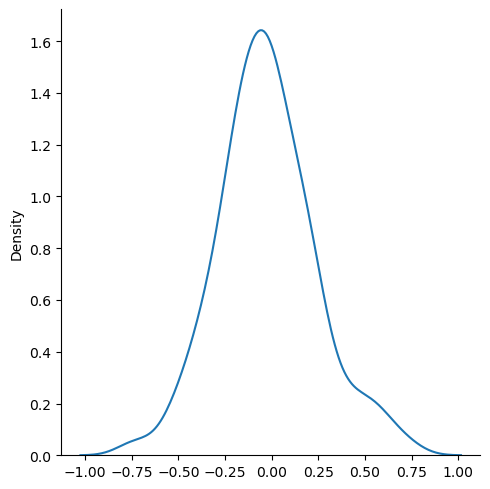

In [53]:
import seaborn as sns
sns.displot(reg_pred - y_test,kind ='kde')

In [54]:
from sklearn.metrics import r2_score


In [55]:
score = r2_score(reg_pred,y_test)

In [62]:
score

0.7010704613356736